13
     ┌───┐                                                                ┌───────┐┌─┐         
q_0: ┤ H ├───────■────────────────────────────────────────────────────────┤0      ├┤M├─────────
     ├───┤       │                                                        │       │└╥┘┌─┐      
q_1: ┤ H ├───────┼───────────────■────────────────────────────────────────┤1      ├─╫─┤M├──────
     ├───┤       │               │                                        │  QFT† │ ║ └╥┘┌─┐   
q_2: ┤ H ├───────┼───────────────┼───────────────■────────────────────────┤2      ├─╫──╫─┤M├───
     ├───┤       │               │               │                        │       │ ║  ║ └╥┘┌─┐
q_3: ┤ H ├───────┼───────────────┼───────────────┼───────────────■────────┤3      ├─╫──╫──╫─┤M├
     └───┘┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐└───────┘ ║  ║  ║ └╥┘
q_4: ─────┤0             ├┤0             ├┤0             ├┤0             ├──────────╫──╫──╫──╫─
          │              ││          

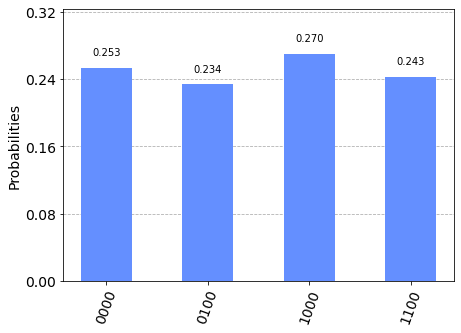

In [35]:
from qiskit import *
import numpy as np
from math import *
from qiskit.visualization import plot_histogram

N = 15
#a = np.random.randint(2, 15)
a = 13
print(a)
factor1 = 0
factor2 = 0
k = gcd(a, N)
if k != 1:
    factor1 = k
    factor2 = int(N/k)
    print("The factors of", N, "are", factor1, "and", factor2)
    break
else:
    

def a_mod15(a, x):
    if a not in [2,7,8,11,13]:
        raise ValueError("'a' must be 2,7,8,11 or 13")
    U = QuantumCircuit(4)
    for iteration in range(x):
        if a in [2, 13]:
            U.swap(0, 1)
            U.swap(1, 2)
            U.swap(2, 3)
        if a in [7, 8]:
            U.swap(2, 3)
            U.swap(1, 2)
            U.swap(0, 1)
        if a == 11:
            U.swap(1, 3)
            U.swap(0, 2)
        if a in [7, 11, 13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = "%i^%i mod 15" % (a, x)
    c_U = U.control()
    return c_U

def mod_exp(qc, n, m, a):
    for x in range(n):
        qc.append(a_mod15(a, 2**x), [x] + list(range(n, n + m))) 

def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

def iqft(qc, n):
    qc.append(qft_dagger(len(n)), n)
    
def circ(n, m, a):
    # Let n = 'X register'
    # Let m = 'W register'
    qc = QuantumCircuit(n + m, n)
    qc.h(range(n))
    qc.x(n + m - 1)
    
    mod_exp(qc, n, m, a)
              
    iqft(qc, range(n))
    
    qc.measure(range(n), range(n))
              
    return qc

n = 4
m = 4


qc = circ(n, m, a)
print(qc.draw(fold=-1))


simulator = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend=simulator).result().get_counts(qc)

plot_histogram(counts)
